In [1]:
import tensorflow as tf
import cv2
import posenet
from lucas import poseEst
from lucas import lucas
import time
import matplotlib.pyplot as plt

In [2]:
sess,model_cfg,model_outputs,output_stride=poseEst.load_model()

In [9]:
count=0
gap=1
win_s=10
numLevel=2
frame_count=0
exec_data=[[]]

cap = cv2.VideoCapture(0)
input_image,display_image,output_scale = posenet.read_cap(cap,scale_factor=1,output_stride=output_stride)
pose_score,points,scores=poseEst.pose_est(sess,input_image,model_outputs,output_stride,output_scale)
while True:

    input_image,display_image,output_scale = posenet.read_cap(cap,scale_factor=1,output_stride=output_stride)
    
    eachstart=time.time()

    if count%gap==0:
        pose_score,points,scores=poseEst.pose_est(sess,input_image,model_outputs,output_stride,output_scale)
        last_image=display_image
    else:
        try:
            points=lucas.getDet(last_image,display_image,points,win_s,numLevel)
        except:
            count=0
            continue
    count+=1

    exec_data[-1].append(time.time()-eachstart)

    cv2.waitKey(0)
    frame_count+=1
    if frame_count==100:
        gap+=1
        frame_count=0
        if gap>6:
            break
        exec_data.append([])

cap.release()
cv2.destroyAllWindows()

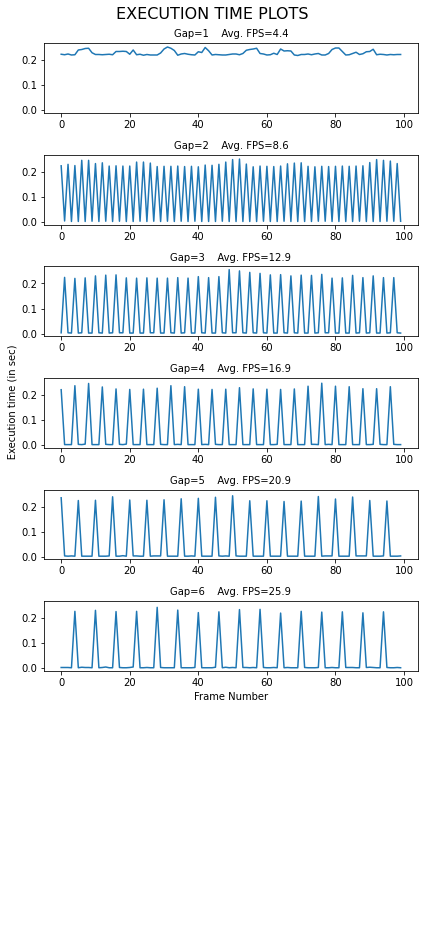

In [59]:
fig, axs = plt.subplots(len(exec_data), sharex=False, sharey=True, figsize = (6,10))
fig.suptitle('EXECUTION TIME PLOTS',fontsize=16)
for i in range(len(exec_data)):
    axs[i].plot(exec_data[i])
    axs[i].set_title("Gap="+str(i+1)+"    Avg. FPS={:.1f}".format(1/(sum(exec_data[i])/len(exec_data[i]))),fontsize=10)
plt.xlabel("Frame Number")
plt.ylabel(" "*150+"Execution time (in sec)")
plt.tight_layout()
plt.show()

In [13]:
avg_fps_lst=[None]
for i in exec_data:
    print(1/(sum(i)/len(i)))
    avg_fps_lst.append(1/(sum(i)/len(i)))

4.357743795704162
8.615563657971384
12.941453147652265
16.9434522767154
20.938050526233813
25.91506800698532


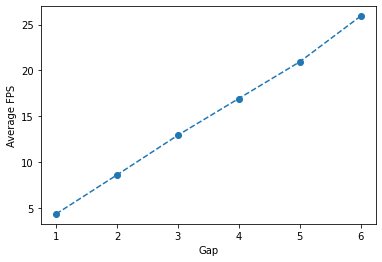

In [64]:
plt.plot(avg_fps_lst,linestyle='--', marker='o')
plt.xlabel("Gap")
plt.ylabel("Average FPS")
plt.show()